In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Parameters

In [2]:
TF1 = 1
TF2 = 2
TF3 = 3
NTest = 96
NVal = 100
T1 = 14
D = 15

In [3]:
def split_X_Y(ar, T, TF):
  X = []
  Y = []
  for t in range(len(ar) - T - TF + 1):
    x = ar[t : t + T, 0: -1]
    X.append(x)
    y = ar[t + T : t + T + TF, -1:]
    Y.append(y)

  X = np.array(X).astype(float) 
  if TF == 1:
    Y = np.array(Y).astype(float).reshape(len(Y), )
  else:
    Y = np.array(Y).astype(float).reshape(len(Y), TF)
  print("X.shape", X.shape, "Y.shape", Y.shape) 
  return X, Y

In [4]:
def feature_selection(x_train, y_train):
  rfe = RFE(RandomForestRegressor(), n_features_to_select=18)
  fit = rfe.fit(x_train.reshape(len(x_train),D*T1), y_train)
  important_features = list()
  for i in range(len(fit.support_)):
      if fit.support_[i]:
          important_features.append(i)
  result = np.array(important_features)
  calMostFeature = [0]*D
  for i in result:
    calMostFeature[i%D] = calMostFeature[i%D] + 1
  print(calMostFeature)
  return calMostFeature

In [5]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score
from statistics import mean 

In [6]:
def deviation_function(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(deviation)
def deviation_function_inv(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(np.array(deviation).mean(axis=1))
def evaluation(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df
def evaluation_inv(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function_inv(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

# Normalization Dataset

In [7]:
df_normalize = pd.read_csv("G:/My Drive/IS6102.CH1701/Result/Dataset/normalization.csv", parse_dates=['Date'], index_col=0)
df_normalize.head(5)

,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,
2020-03-12,0.195054,0.428501,0.252108,0.035745,0.666943,0.028726,0.090175,0.096398,0.215437,0.385386,0.294139,0.478063,0.760187,0.813189,0.055378,0.000000
2020-03-13,0.066875,0.429926,0.236596,0.038759,0.662361,0.030444,0.023122,0.096398,0.145379,0.473294,0.327844,0.241249,0.699492,0.549101,0.038502,0.009472
2020-03-14,0.066875,0.429926,0.224523,0.036015,0.668942,0.030070,0.027929,0.096398,0.153463,0.453264,0.315684,0.060818,0.682915,0.560035,0.160002,0.003668
2020-03-15,0.066875,0.429926,0.241015,0.036838,0.654064,0.026986,0.015865,0.096398,0.129212,0.405045,0.227655,0.267530,0.500701,0.355787,0.267800,0.006734
2020-03-16,0.014977,0.411145,0.231549,0.033910,0.652156,0.028229,0.012953,0.096398,0.129212,0.416914,0.271336,0.282272,0.733482,0.526008,0.069977,0.000698


In [8]:
ar_original_minmax = df_normalize.to_numpy()
ar_original_minmax

array([[0.195054  , 0.4285006 , 0.25210841, ..., 0.81318927, 0.05537789,
        0.        ],
       [0.06687549, 0.42992625, 0.23659559, ..., 0.5491007 , 0.03850218,
        0.00947215],
       [0.06687549, 0.42992625, 0.22452314, ..., 0.56003522, 0.16000223,
        0.00366761],
       ...,
       [0.66997559, 0.70854771, 0.19900319, ..., 0.73869017, 0.08532489,
        0.24308976],
       [0.66997559, 0.70854771, 0.19728917, ..., 0.7039487 , 0.07841119,
        0.25020148],
       [0.66997559, 0.70854771, 0.20929626, ..., 0.50852748, 0.11842803,
        0.27466851]])

## Sliding Windows

In [9]:
x12_original_minmax, y12_original_minmax = split_X_Y(ar_original_minmax, T1, TF1)

X.shape (1082, 14, 15) Y.shape (1082,)


## Train Val Test

In [10]:
x12_original_minmax_train, y12_original_minmax_train = x12_original_minmax[:-NTest], y12_original_minmax[: -NTest]
x12_original_minmax_test, y12_original_minmax_test = x12_original_minmax[-NTest:], y12_original_minmax[-NTest:]

In [11]:
print(x12_original_minmax_train.shape, y12_original_minmax_train.shape )
print(x12_original_minmax_test.shape, y12_original_minmax_test.shape )

(986, 14, 15) (986,)
(96, 14, 15) (96,)


## Feature Section

In [12]:
top_idx = np.loadtxt(f"G:/My Drive/IS6102.CH1701/Result/FeatureSelection/{T1}_{TF1}.csv", dtype=int)
top_idx

array([0, 1, 3, 6, 7, 8])

In [13]:
NFeature = len(top_idx)
NFeature 

6

In [14]:
x12_original_minmax_train = x12_original_minmax_train[:,:,top_idx]
x12_original_minmax_test = x12_original_minmax_test[:,:,top_idx]

In [15]:
print(x12_original_minmax_train.shape)
print(x12_original_minmax_test.shape)

(986, 14, 6)
(96, 14, 6)


## Build The Model

### SARIMAX

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

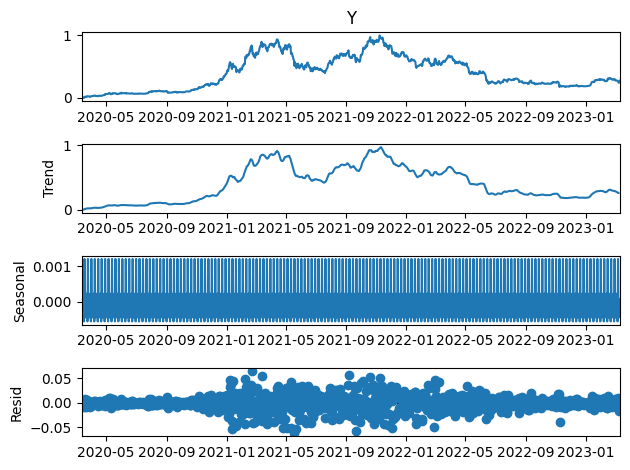

In [31]:
# from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_normalize["Y"])
result.plot()
pyplot.show()

In [51]:
import statsmodels.api as sm

In [52]:
sarimax_mod = sm.tsa.statespace.SARIMAX(y12_original_minmax_train, exog = x12_original_minmax_train.reshape(len(x12_original_minmax_train),6*T1))
sarimax_fit = sarimax_mod.fit()

In [34]:
sarimax_pred = sarimax_fit.predict(start = 1, end = len(y12_original_minmax_test), exog = x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))

In [35]:
evaluation(y12_original_minmax_test, sarimax_pred, "SARIMAX")

mse: 0.036106799828210544
mae: 0.1859772716257563
rmse: 0.19001789344219808
R-Squared: -15.565222042314254
Deviation: 0.7494795787859525


,mse,mae,rmse,r2,deviation
SARIMAX,0.036107,0.185977,0.190018,-15.565222,0.74948


### Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [36]:
#linear regression model
from sklearn.linear_model import LinearRegression 
#Grid search model
from sklearn.model_selection import GridSearchCV         

In [37]:
parameters = {
    'fit_intercept':[True,False], 
    'copy_X':[True, False]
    }

In [38]:
lr_mod = GridSearchCV(LinearRegression(),parameters, scoring='r2', cv=None)
lr_fit = lr_mod.fit(x12_original_minmax_train.reshape(len(x12_original_minmax_train),NFeature*T1), y12_original_minmax_train)

In [39]:
lr_pred = lr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))

In [40]:
evaluation(y12_original_minmax_test, lr_pred, "Linear Regression")

mse: 0.0004664635990465291
mae: 0.016676965843055173
rmse: 0.021597768381166817
R-Squared: 0.7859939643051508
Deviation: 0.06951687500421232


,mse,mae,rmse,r2,deviation
Linear Regression,0.000466,0.016677,0.021598,0.785994,0.069517


In [41]:
df_lr_para = pd.DataFrame(lr_mod.best_params_, index=[0])
df_lr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/LR_parameter/{T1}_{TF1}.csv")

### XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/
https://xgboost.readthedocs.io/en/stable/

In [ ]:
# !pip install xgboost

In [66]:
from xgboost import XGBRegressor 

In [67]:
parameters = {
    'n_estimators': [80, 90, 100, 125, 150,200,1000,2000,3000, 3500],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': np.arange(0.1, 1, 0.1)
}

In [68]:
xgbr_mod = GridSearchCV(XGBRegressor(),parameters, scoring='r2', cv=None)
xgbr_fit = xgbr_mod.fit(x12_original_minmax_train.reshape(len(x12_original_minmax_train),NFeature*T1), y12_original_minmax_train)

In [69]:
xgbr_pred = xgbr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))

In [70]:
evaluation(y12_original_minmax_test, xgbr_pred, "XGBoost Regression")

mse: 0.0008187996946216633
mae: 0.02391762389965375
rmse: 0.028614676210323667
R-Squared: 0.6243478011310877
Deviation: 0.10247388468912687


,mse,mae,rmse,r2,deviation
XGBoost Regression,0.000819,0.023918,0.028615,0.624348,0.102474


In [71]:
xgbr_mod.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 2, 'n_estimators': 80}

In [72]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])

In [73]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])
df_xgbr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/XBG_parameter/{T1}_{TF1}.csv")

### Long Short Term Memory

In [ ]:
# !pip install -q -U keras-tuner

In [ ]:
# !python -m pip uninstall tensorflow-macos
# !python -m pip uninstall tensorflow-metal

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install numpy

In [ ]:
# !pip install numpy --upgrade 

In [ ]:
# !pip install keras_tuner

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Bidirectional
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [43]:
def LSTM_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(LSTM(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [ ]:
# BayesianOptimization
# Hyperband

In [44]:
lstm_tuner = kt.BayesianOptimization(LSTM_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=300,
                                     project_name='LSTM_orignal_x12_y12')

In [45]:
lstm_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [46]:
lstm_tuner.search(x12_original_minmax_train, y12_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x12_original_minmax_test, y12_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Trial 10 Complete [00h 00m 40s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 10m 23s
INFO:tensorflow:Oracle triggered exit


In [47]:
lstm_best_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [48]:
lstm_best_hps

In [49]:
print(lstm_best_hps.get('layer_1'))
print(lstm_best_hps.get('layer_2'))
print(lstm_best_hps.get('layer_3'))
print(lstm_best_hps.get('layer_4'))
print(lstm_best_hps.get('layer_5'))
print(lstm_best_hps.get('learning_rate'))
print(lstm_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

15
10
10
15
5
0.01
tanh
0.0


In [50]:
lstm_para = []
lstm_para.append(lstm_best_hps.get('layer_1'))
lstm_para.append(lstm_best_hps.get('layer_2'))
lstm_para.append(lstm_best_hps.get('layer_3'))
lstm_para.append(lstm_best_hps.get('layer_4'))
lstm_para.append(lstm_best_hps.get('layer_5'))
lstm_para.append(lstm_best_hps.get('learning_rate'))
lstm_para.append(lstm_best_hps.get('activation'))
lstm_para.append(lstm_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/LSTM_parameter/{T1}_{TF1}.csv", np.array(lstm_para), delimiter=",", fmt="%s")

In [51]:
lstm_para

[15, 10, 10, 15, 5, 0.01, 'tanh', 0.0]

In [52]:
lstm_mod = lstm_tuner.hypermodel.build(lstm_best_hps)
lstm_history = lstm_mod.fit(x12_original_minmax_train, y12_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x12_original_minmax_test, y12_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Epoch 1/300
158/158 [==============================] - 17s 39ms/step - loss: 0.0228 - mae: 0.1105 - val_loss: 0.0056 - val_mae: 0.0624
Epoch 2/300
158/158 [==============================] - 3s 22ms/step - loss: 0.0078 - mae: 0.0674 - val_loss: 0.0606 - val_mae: 0.2427
Epoch 3/300
158/158 [==============================] - 4s 23ms/step - loss: 0.0061 - mae: 0.0582 - val_loss: 0.0344 - val_mae: 0.1806
Epoch 4/300
158/158 [==============================] - 3s 22ms/step - loss: 0.0062 - mae: 0.0591 - val_loss: 0.0239 - val_mae: 0.1462
Epoch 5/300
158/158 [==============================] - 4s 22ms/step - loss: 0.0041 - mae: 0.0477 - val_loss: 0.0151 - val_mae: 0.1106
Epoch 6/300
158/158 [==============================] - 4s 23ms/step - loss: 0.0041 - mae: 0.0472 - val_loss: 0.0444 - val_mae: 0.2072


In [53]:
lstm_pred = lstm_mod.predict(x12_original_minmax_test)

3/3 [==============================] - 2s 30ms/step


In [54]:
evaluation(y12_original_minmax_test, lstm_pred.flatten(), "Long Short Term Memory")

mse: 0.023252727620492807
mae: 0.15037732238454768
rmse: 0.15248845077740414
R-Squared: -9.667979382154146
Deviation: 0.6366862227851072


,mse,mae,rmse,r2,deviation
Long Short Term Memory,0.023253,0.150377,0.152488,-9.667979,0.636686


### Gate Recurrent Unit

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [56]:
def GRU_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(GRU(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [57]:
gru_tuner = kt.BayesianOptimization(GRU_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=20,
                                     project_name='GRU_orignal_x12_y12')

In [58]:
gru_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [59]:
gru_tuner.search(x12_original_minmax_train, y12_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x12_original_minmax_test, y12_original_minmax_test), 
                  callbacks=[gru_stop_early])

Trial 10 Complete [00h 01m 30s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 16m 18s
INFO:tensorflow:Oracle triggered exit


In [60]:
gru_best_hps = gru_tuner.get_best_hyperparameters(num_trials=1)[0]

In [61]:
print(gru_best_hps.get('layer_1'))
print(gru_best_hps.get('layer_2'))
print(gru_best_hps.get('layer_3'))
print(gru_best_hps.get('layer_4'))
print(gru_best_hps.get('layer_5'))
print(gru_best_hps.get('learning_rate'))
print(gru_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

15
5
10
10
10
0.001
tanh
0.0


In [62]:
gru_para = []
gru_para.append(gru_best_hps.get('layer_1'))
gru_para.append(gru_best_hps.get('layer_2'))
gru_para.append(gru_best_hps.get('layer_3'))
gru_para.append(gru_best_hps.get('layer_4'))
gru_para.append(gru_best_hps.get('layer_5'))
gru_para.append(gru_best_hps.get('learning_rate'))
gru_para.append(gru_best_hps.get('activation'))
gru_para.append(gru_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/GRU_parameter/{T1}_{TF1}.csv", np.array(gru_para), delimiter=",", fmt="%s")

In [63]:
gru_mod = gru_tuner.hypermodel.build(gru_best_hps)
gru_history = gru_mod.fit(x12_original_minmax_train, y12_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x12_original_minmax_test, y12_original_minmax_test), 
                  callbacks=[gru_stop_early])

Epoch 1/200
158/158 [==============================] - 10s 24ms/step - loss: 0.0810 - mae: 0.2209 - val_loss: 0.0023 - val_mae: 0.0357
Epoch 2/200
158/158 [==============================] - 3s 16ms/step - loss: 0.0298 - mae: 0.1312 - val_loss: 0.0018 - val_mae: 0.0303
Epoch 3/200
158/158 [==============================] - 3s 17ms/step - loss: 0.0238 - mae: 0.1186 - val_loss: 0.0040 - val_mae: 0.0577
Epoch 4/200
158/158 [==============================] - 3s 16ms/step - loss: 0.0205 - mae: 0.1098 - val_loss: 0.0018 - val_mae: 0.0330
Epoch 5/200
158/158 [==============================] - 3s 20ms/step - loss: 0.0186 - mae: 0.1031 - val_loss: 0.0017 - val_mae: 0.0293
Epoch 6/200
158/158 [==============================] - 4s 24ms/step - loss: 0.0168 - mae: 0.0985 - val_loss: 0.0020 - val_mae: 0.0355
Epoch 7/200
158/158 [==============================] - 3s 19ms/step - loss: 0.0143 - mae: 0.0921 - val_loss: 0.0048 - val_mae: 0.0642
Epoch 8/200
158/158 [==============================] - 3s 19m

In [64]:
gru_pred = gru_mod.predict(x12_original_minmax_test)

3/3 [==============================] - 2s 5ms/step


In [65]:
evaluation(y12_original_minmax_test, gru_pred.flatten(), "Gate Recurrent Unit")

mse: 0.002762632903861291
mae: 0.04848070884239527
rmse: 0.052560754407269414
R-Squared: -0.2674517733945003
Deviation: 0.1963409524910087


,mse,mae,rmse,r2,deviation
Gate Recurrent Unit,0.002763,0.048481,0.052561,-0.267452,0.196341


## Evaluate

In [74]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [75]:
y_test_inv = scaler_single.inverse_transform(y12_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [76]:
sarimax_df = evaluation_inv(y_test_inv, y_sarimax, "SARIMAX")
lr_df = evaluation_inv(y_test_inv, y_lr, "Linear Regression")
xgbr_df = evaluation_inv(y_test_inv, y_xgbr, "XGBoost Regression")
lstm_df = evaluation_inv(y_test_inv, y_lstm, "Long Short Term Memory")
gru_df = evaluation_inv(y_test_inv, y_gru, "Gate Recurrent Unit")

mse: 141475982.175084
mae: 11641.440741041448
rmse: 11894.367666046144
R-Squared: -15.56522204231425
Deviation: 0.5637964512860698
mse: 1827727.634074928
mae: 1043.912021641959
rmse: 1351.9347743419162
R-Squared: 0.7859939643051508
Deviation: 0.05183616262873266
mse: 3208274.2714973837
mae: 1497.1486918131523
rmse: 1791.1656181094431
R-Squared: 0.624347717097115
Deviation: 0.07588675993286208
mse: 91110337.08771785
mae: 9413.025207519531
rmse: 9545.173496994063
R-Squared: -9.667980112273424
Deviation: 0.4729751322152628
mse: 10824725.176112939
mae: 3034.7003580729156
rmse: 3290.095010195441
R-Squared: -0.2674517139413075
Deviation: 0.14753569059644892


In [77]:
df_evaluation = pd.concat([sarimax_df, lr_df, xgbr_df, lstm_df, gru_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
SARIMAX,1.414760e+08,11641.440741,11894.367666,-15.565222,0.563796
Linear Regression,1.827728e+06,1043.912022,1351.934774,0.785994,0.051836
XGBoost Regression,3.208274e+06,1497.148692,1791.165618,0.624348,0.075887
Long Short Term Memory,9.111034e+07,9413.025208,9545.173497,-9.667980,0.472975
Gate Recurrent Unit,1.082473e+07,3034.700358,3290.095010,-0.267452,0.147536


In [78]:
df_evaluation.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Evaluation/evaluation_original_{T1}_{TF1}.csv")

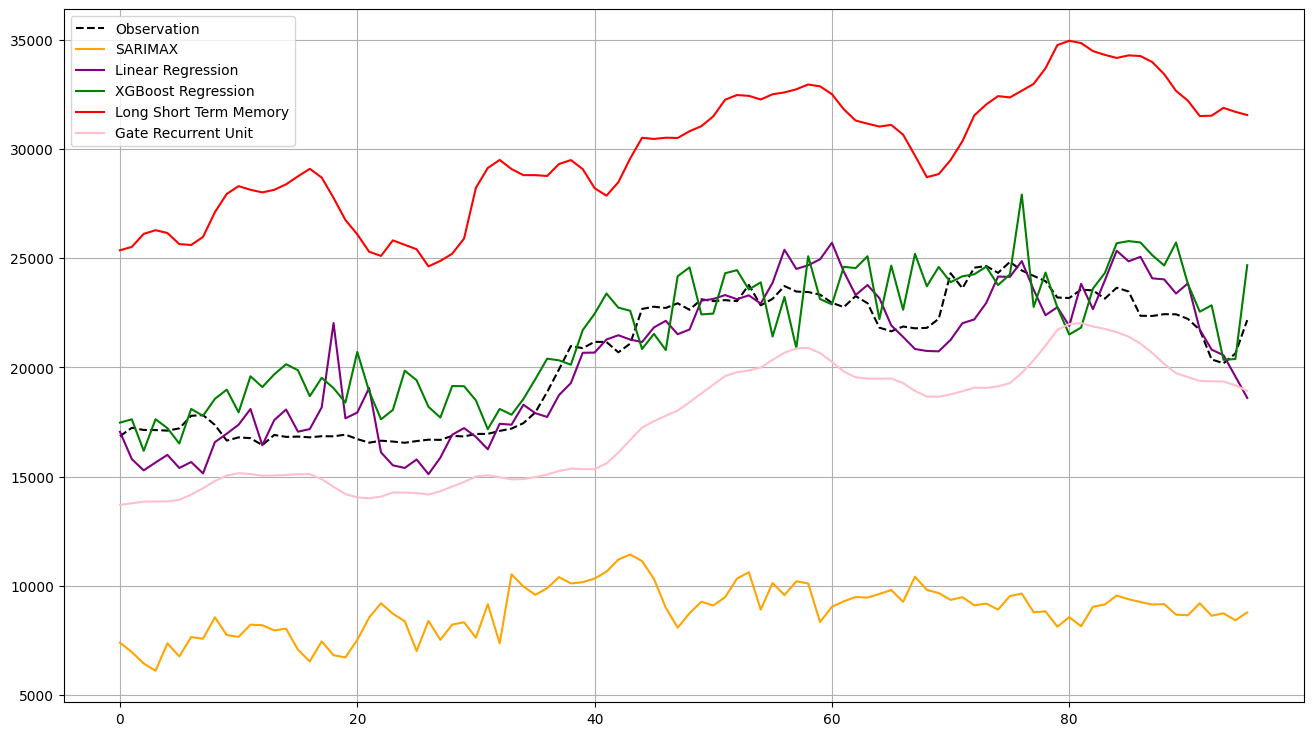

In [79]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(y_test_inv, 'black', label='Observation', linestyle='dashed')
plt.plot(y_sarimax, 'orange', label='SARIMAX')
plt.plot(y_lr, 'purple', label=f'Linear Regression')
plt.plot(y_xgbr, 'green', label=f'XGBoost Regression')
plt.plot(y_lstm, 'red', label=f'Long Short Term Memory')
plt.plot(y_gru, 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/IS6102.CH1701/Result/Image/{T1}_{TF1}.png')

## Save Model

In [80]:
from tensorflow.keras.models import load_model

In [26]:
import pickle
# Other
sarimax_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
pickle.dump(sarimax_fit, open(sarimax_filename, 'wb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
pickle.dump(lr_mod, open(lr_filename, 'wb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
pickle.dump(xgbr_mod, open(xgbr_filename, 'wb'))
#### Keras
lstm_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

# Draft

In [53]:
from tensorflow.keras.models import load_model

In [54]:
import pickle
# Other
sarimax_filename =  f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
sarimax_mod = pickle.load(open(sarimax_filename, 'rb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

In [55]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [56]:
sarimax_pred = sarimax_mod.predict(start = 1, end = len(y12_original_minmax_test), exog = x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x12_original_minmax_test)
gru_pred = gru_mod.predict(x12_original_minmax_test)

3/3 [==============================] - 1s 4ms/step


In [57]:
y_test_inv = scaler_single.inverse_transform(y12_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [58]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [59]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1082,)


In [60]:
date_test = date_array[-NTest:]
date_test = date_test

In [61]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [62]:
detail_sarima = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax
}
df_sarima = pd.DataFrame(detail_sarima, columns = ["Date", "Y_test","Y_SARIMAX"])
df_sarima.set_index("Date", inplace = True)
df_sarima.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_SARIMAX.csv")

In [63]:
detail_lr = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LR": y_lr
}
df_lr = pd.DataFrame(detail_lr, columns = ["Date", "Y_test","Y_LR"])
df_lr.set_index("Date", inplace = True)
df_lr.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_LR.csv")

In [64]:
detail_XGRB = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_XGBR": y_xgbr
}
df_XGRB = pd.DataFrame(detail_XGRB, columns = ["Date", "Y_test","Y_XGRB"])
df_XGRB.set_index("Date", inplace = True)
df_XGRB.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_XGRB.csv")

In [65]:
detail_LSTM = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LSTM": y_lstm
}
df_LSTM = pd.DataFrame(detail_LSTM, columns = ["Date", "Y_test","Y_LSTM"])
df_LSTM.set_index("Date", inplace = True)
df_LSTM.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_LSTM.csv")

In [66]:
detail_GRU = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_GRU": y_gru
}
df_GRU = pd.DataFrame(detail_GRU, columns = ["Date", "Y_test","Y_GRU"])
df_GRU.set_index("Date", inplace = True)
df_GRU.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_GRU.csv")

In [67]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.to_csv(f"G:/My Drive/IS6102.CH1701/Result/VisualizeCuaTruc/{T1}_days_{TF1}_day_ALL.csv")

# Draft

In [16]:
from tensorflow.keras.models import load_model

In [17]:
import pickle
# Other
sarimax_filename =  f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
sarimax_mod = pickle.load(open(sarimax_filename, 'rb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

In [18]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [19]:
sarimax_pred = sarimax_mod.predict(start = 1, end = len(y12_original_minmax_test), exog = x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x12_original_minmax_test.reshape(len(x12_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x12_original_minmax_test)
gru_pred = gru_mod.predict(x12_original_minmax_test)

3/3 [==============================] - 2s 4ms/step


In [20]:
y_test_inv = scaler_single.inverse_transform(y12_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [21]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [22]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1082,)


In [23]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1082,)


In [24]:
date_test = date_array[-NTest:]
date_test = date_test

In [25]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [26]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-07,16848.126953,6969.384764,52302.648882,54809.410156,59123.878906,51132.964844
2022-12-08,17233.474609,6864.310116,53785.022587,55275.628906,59329.621094,51192.914062
2022-12-09,17133.152344,6933.804153,53074.345247,55736.449219,59475.503906,51305.910156
2022-12-10,17128.724609,5749.678008,52753.752607,54372.804688,59467.273438,51412.437500
2022-12-11,17104.193359,7460.168851,53237.916136,53357.054688,59435.203125,51504.906250


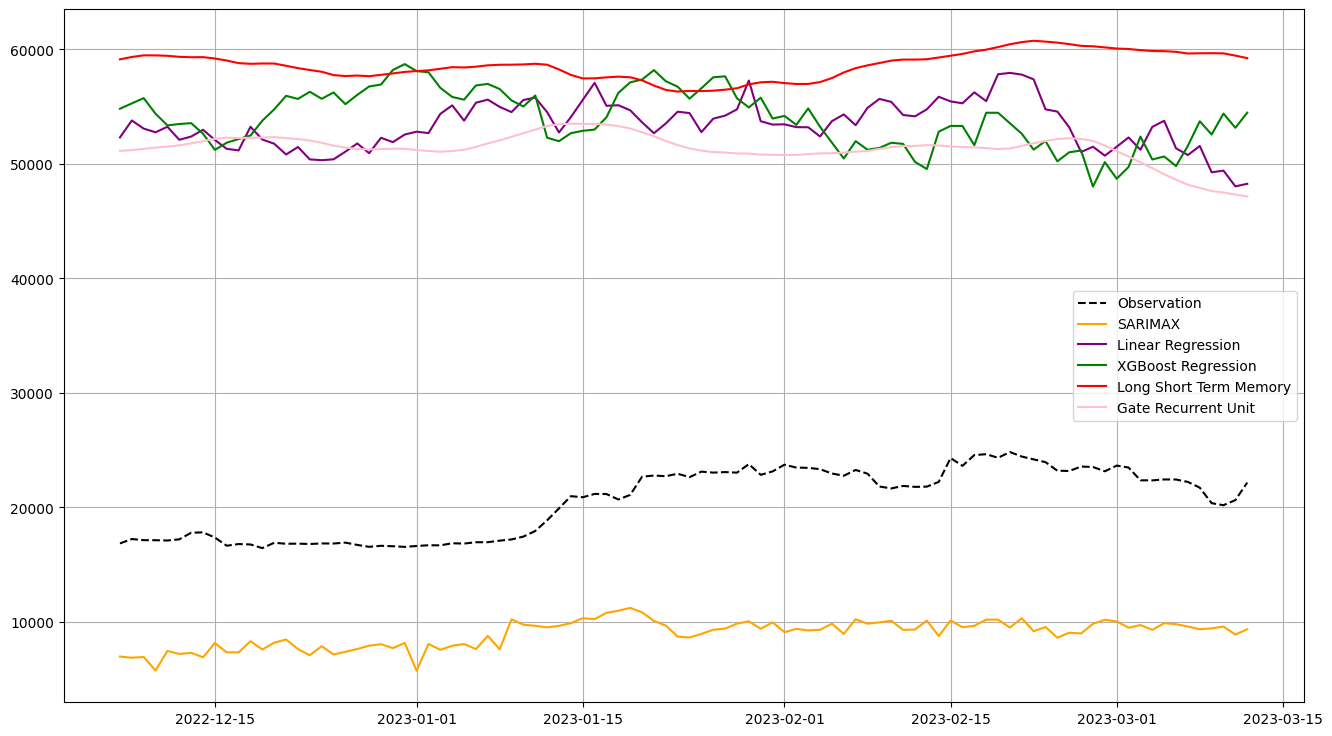

In [27]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(df['Y_test'], 'black', label='Observation', linestyle='dashed')
plt.plot(df['Y_SARIMAX'], 'orange', label='SARIMAX')
plt.plot(df["Y_LR"], 'purple', label=f'Linear Regression')
plt.plot(df["Y_XGBR"], 'green', label=f'XGBoost Regression')
plt.plot(df["Y_LSTM"], 'red', label=f'Long Short Term Memory')
plt.plot(df["Y_GRU"], 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/IS6102.CH1701/Result/Image/{T1}_{TF1}.png')